# *Cryptocurrency Analysis and Forecasting*

## *Step 1: Data Retrieval*

Formatting the API of the sequence is as follows: root + symbol=[symbol] + &interval=[time] where the root is as follows: https://api.binance.com/api/v1/klines?

Going to be using the Python Requests package. 

Types of cryptocurrencies for project: 
* BNB: symbol = BNBUSDT
* Ethereum: symbol = ETHUSDT
* Bitcoin: symbol = BTCUSDT
* Ripple: symbol = XRPUSDT

Types of time intervals for project: 
* &interval = 1m 
* &interval = 5m 
* &interval = 15m 
* &interval = 30m 
* &interval = 1h

Number of observations for each time interval: 5

Total observations = 100

In [8]:
import requests as rq
r = rq.get('https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m')

Let's first see what kind of output the given example produces.

In [14]:
r.json()[0]

[1585489980000,
 '128.66000000',
 '128.71000000',
 '128.64000000',
 '128.71000000',
 '47.73279000',
 1585490039999,
 '6142.25434230',
 36,
 '12.08405000',
 '1555.10473150',
 '0']

The following is what is meant by each row from top to bottom:
* open time
* open 
* high
* low
* close
* volume
* close time
* quote asset volume
* number of trades
* taker buy base asset volume
* taker buy quote asset volume
* ignore value: not important to project

Now after this, let's put together the required dataset. 

In [52]:
import pandas as pd
import numpy as np
column_names = ["symbol", "time interval", "open time", 
               "open", "high", "low", "close", "volume",
               "close time", "quote asset volume", "number of trades",
               "taker buy base asset volume", "taker buy quote asset volume",
               "ignored value"]
cryptodf = pd.DataFrame(columns = column_names, index = range(0,100))
cryptodf.shape

(100, 14)

In [54]:
symbols = ["BNBUSDT","ETHUSDT","BTCUSDT","XRPUSDT"]
time_intervals = ["1m", "5m", "15m", "30m", "1h"]
current_row_index = 0
for i in symbols:
    for j in time_intervals:
        get_string = 'https://api.binance.com/api/v1/klines?symbol={}&interval={}'.format(i, j)
        r = rq.get(get_string).json()
        for k in range(0,5):
            row_values = [i, j]
            for l in r[k]:
                row_values.append(l)
            cryptodf.iloc[current_row_index] = row_values
            current_row_index = current_row_index + 1
cryptodf.shape

(100, 14)

## *Step 2: Data Preparation*

The following columns are needed, and any not on this list can be removed:
* open time
* open
* high
* low 
* close
* volume
* number of trades

Let's also keep the following two columns:
* symbol
* time interval

Another issue to keep eyes on: make sure that all of the columns, apart from symbol and time interval, are of the float datatype. 

In [57]:
list(cryptodf.columns)

['symbol',
 'time interval',
 'open time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close time',
 'quote asset volume',
 'number of trades',
 'taker buy base asset volume',
 'taker buy quote asset volume',
 'ignored value']

In [60]:
cryptodf = cryptodf[['symbol','time interval','open time','open',
          'high','low','close','volume', 'number of trades']]
cryptodf.shape

(100, 9)

In [69]:
col_data_types = cryptodf.dtypes
print('Data type of each column :')
print(col_data_types)

Data type of each column :
symbol              object
time interval       object
open time           object
open                object
high                object
low                 object
close               object
volume              object
number of trades    object
dtype: object


From the previous results, we note that most of the columns are of the object type, whereas we want them to be of the float type. 

In [71]:
cryptodf = cryptodf.astype({"open time": float,
                       "open": float,
                       "high": float,
                       "low": float,
                       "close": float,
                       "volume": float,
                       "number of trades": float})

col_data_types = cryptodf.dtypes
print('Data type of each column :')
print(col_data_types)

Data type of each column :
symbol               object
time interval        object
open time           float64
open                float64
high                float64
low                 float64
close               float64
volume              float64
number of trades    float64
dtype: object


## *Step 3: Data Exploration Analysis*

For this phase, group observations by first their symbol and then by their respective time intervals and find mean, standard deviation, max value, and min values for each group. 

Furthermore, aim to construct 3 graphs to visualize the data, and describe what we see in these 3 graphs. 

The following blocks of code are organized as follows: For each of the cryptocurrencies - BNB, Ethereum, Bitcoin, RippleFirst - the descriptive stats for the time intervals - 1 minute, 5 minutes, 15 minutes, 30 minutes, 1 hour - are displayed, in that order.

In [88]:
print('BNB, 1 minute')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BNBUSDT").groupby("time interval").get_group("1m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('BNB, 5 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BNBUSDT").groupby("time interval").get_group("5m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('BNB, 15 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BNBUSDT").groupby("time interval").get_group("15m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('BNB, 30 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BNBUSDT").groupby("time interval").get_group("30m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('BNB, 1 hour')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BNBUSDT").groupby("time interval").get_group("1h").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')

BNB, 1 minute
-------------
open time           1.585493e+12
open                1.189908e+01
high                1.190566e+01
low                 1.189170e+01
close               1.189862e+01
volume              2.503332e+03
number of trades    5.780000e+01
Name: mean, dtype: float64
open time           94868.329805
open                    0.006840
high                    0.002061
low                     0.006625
close                   0.005618
volume                676.922555
number of trades       27.499091
Name: std, dtype: float64
open time           1.585493e+12
open                1.188730e+01
high                1.190380e+01
low                 1.188280e+01
close               1.188870e+01
volume              1.467750e+03
number of trades    2.600000e+01
Name: min, dtype: float64
open time           1.585493e+12
open                1.190400e+01
high                1.190920e+01
low                 1.189960e+01
close               1.190220e+01
volume              3.175240e+03
nu

In [89]:
print('Ethereum, 1 minute')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "ETHUSDT").groupby("time interval").get_group("1m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ethereum, 5 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "ETHUSDT").groupby("time interval").get_group("5m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ethereum, 15 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "ETHUSDT").groupby("time interval").get_group("15m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ethereum, 30 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "ETHUSDT").groupby("time interval").get_group("30m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ethereum, 1 hour')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "ETHUSDT").groupby("time interval").get_group("1h").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')

Ethereum, 1 minute
-------------
open time           1.585493e+12
open                1.292640e+02
high                1.293100e+02
low                 1.291820e+02
close               1.292240e+02
volume              2.592047e+02
number of trades    9.920000e+01
Name: mean, dtype: float64
open time           94868.329805
open                    0.081731
high                    0.084853
low                     0.069426
close                   0.117388
volume                138.468478
number of trades       39.404314
Name: std, dtype: float64
open time           1.585493e+12
open                1.292000e+02
high                1.292200e+02
low                 1.290700e+02
close               1.290700e+02
volume              1.158114e+02
number of trades    5.600000e+01
Name: min, dtype: float64
open time           1.585493e+12
open                1.294000e+02
high                1.294000e+02
low                 1.292600e+02
close               1.293900e+02
volume              4.307249e+

In [90]:
print('Bitcoin, 1 minute')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BTCUSDT").groupby("time interval").get_group("1m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Bitcoin, 5 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BTCUSDT").groupby("time interval").get_group("5m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Bitcoin, 15 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BTCUSDT").groupby("time interval").get_group("15m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Bitcoin, 30 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BTCUSDT").groupby("time interval").get_group("30m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Bitcoin, 1 hour')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "BTCUSDT").groupby("time interval").get_group("1h").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')

Bitcoin, 1 minute
-------------
open time           1.585493e+12
open                6.141756e+03
high                6.144452e+03
low                 6.138614e+03
close               6.140990e+03
volume              3.484026e+01
number of trades    2.972000e+02
Name: mean, dtype: float64
open time           94868.329805
open                    2.770980
high                    2.948935
low                     3.577245
close                   4.282301
volume                 11.865295
number of trades       86.334813
Name: std, dtype: float64
open time           1.585493e+12
open                6.138850e+03
high                6.141180e+03
low                 6.132580e+03
close               6.134350e+03
volume              1.642913e+01
number of trades    1.650000e+02
Name: min, dtype: float64
open time           1.585493e+12
open                6.146110e+03
high                6.147990e+03
low                 6.141130e+03
close               6.146180e+03
volume              4.682731e+0

In [91]:
print('Ripple, 1 minute')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "XRPUSDT").groupby("time interval").get_group("1m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ripple, 5 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "XRPUSDT").groupby("time interval").get_group("5m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ripple, 15 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "XRPUSDT").groupby("time interval").get_group("15m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ripple, 30 minutes')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "XRPUSDT").groupby("time interval").get_group("30m").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')
print('\n')

print('Ripple, 1 hour')
print('-------------')
stats = cryptodf.groupby("symbol").get_group(
    "XRPUSDT").groupby("time interval").get_group("1h").describe()
print(stats.iloc[1])
print(stats.iloc[2])
print(stats.iloc[3])
print(stats.iloc[7])

print('-------------------------------')

Ripple, 1 minute
-------------
open time           1.585493e+12
open                1.733280e-01
high                1.733840e-01
low                 1.732360e-01
close               1.733080e-01
volume              7.242018e+04
number of trades    4.220000e+01
Name: mean, dtype: float64
open time           94868.329805
open                    0.000038
high                    0.000027
low                     0.000087
close                   0.000091
volume              57715.645505
number of trades       23.721298
Name: std, dtype: float64
open time           1.585493e+12
open                1.732800e-01
high                1.733400e-01
low                 1.731000e-01
close               1.731600e-01
volume              2.265700e+04
number of trades    2.000000e+01
Name: min, dtype: float64
open time           1.585493e+12
open                1.733700e-01
high                1.734100e-01
low                 1.733300e-01
close               1.733800e-01
volume              1.604849e+05

In [101]:
bnb_mean_opens = ['BNB', 
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("1m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("5m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("15m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("30m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("1h")["open"].mean()
                 ]

eth_mean_opens = ['ETH', 
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("1m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("5m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("15m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("30m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("1h")["open"].mean()
                 ]

btc_mean_opens = ['BTC', 
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("1m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("5m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("15m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("30m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("1h")["open"].mean()
                 ]

xrp_mean_opens = ['XRP', 
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("1m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("5m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("15m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("30m")["open"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("1h")["open"].mean()
                 ]

mean_opens_df = pd.DataFrame(columns = ['symbol','1m', '5m', '15m', '30m', '1h'], index = range(0,4))
mean_opens_df.iloc[0] = bnb_mean_opens
mean_opens_df.iloc[1] = eth_mean_opens
mean_opens_df.iloc[2] = btc_mean_opens
mean_opens_df.iloc[3] = xrp_mean_opens

mean_opens_df
                  

,symbol,1m,5m,15m,30m,1h
0,BNB,11.8991,12.1384,12.236,11.1872,17.0127
1,ETH,129.264,128.116,136.164,126.304,203.548
2,BTC,6141.76,6176.14,6613.67,5831.59,7926.26
3,XRP,0.173328,0.169874,0.160238,0.154628,0.207478


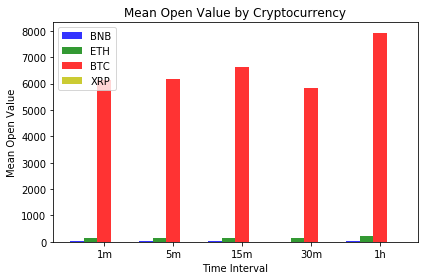

In [170]:
import matplotlib.pyplot as plt

n_groups = 5
means_bnb = list(mean_opens_df.groupby("symbol").get_group("BNB")[["1m","5m","15m","30m","1h"]].iloc[0])
means_eth = list(mean_opens_df.groupby("symbol").get_group("ETH")[["1m","5m","15m","30m","1h"]].iloc[0])
means_btc = list(mean_opens_df.groupby("symbol").get_group("BTC")[["1m","5m","15m","30m","1h"]].iloc[0])
means_xrp = list(mean_opens_df.groupby("symbol").get_group("XRP")[["1m","5m","15m","30m","1h"]].iloc[0])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, means_bnb, bar_width,
alpha=opacity,
color='b',
label='BNB')

rects2 = plt.bar(index + bar_width, means_eth, bar_width,
alpha=opacity,
color='g',
label='ETH')

rects3 = plt.bar(index + 2*bar_width, means_btc, bar_width,
alpha=opacity,
color='r',
label='BTC')

rects4 = plt.bar(index + 3*bar_width, means_xrp, bar_width,
alpha=opacity,
color='y',
label='XRP')

plt.xlabel('Time Interval')
plt.ylabel('Mean Open Value')
plt.title('Mean Open Value by Cryptocurrency')
plt.xticks(index + 2*bar_width, ("1m","5m","15m","30m","1h"))
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

The above plot shows us the various cryptocurrency mean open values across all the time intervals for each of the cryptocurrencies. This is important because we can compare the values at which each of the cryptocurrencies open at, and just from a quick glance, we can tell that the Bitcoin cryptocurrency opens at the highest values across the board. 

In [128]:
bnb_mean_closes = ['BNB', 
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("1m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("5m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("15m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("30m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BNBUSDT").groupby("time interval").get_group("1h")["close"].mean()
                 ]

eth_mean_closes = ['ETH', 
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("1m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("5m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("15m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("30m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("ETHUSDT").groupby("time interval").get_group("1h")["close"].mean()
                 ]

btc_mean_closes = ['BTC', 
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("1m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("5m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("15m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("30m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("BTCUSDT").groupby("time interval").get_group("1h")["close"].mean()
                 ]

xrp_mean_closes = ['XRP', 
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("1m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("5m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("15m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("30m")["close"].mean(),
                  cryptodf.groupby("symbol").get_group("XRPUSDT").groupby("time interval").get_group("1h")["close"].mean()
                 ]

mean_closes_df = pd.DataFrame(columns = ['symbol','1m', '5m', '15m', '30m', '1h'], index = range(0,4))
mean_closes_df.iloc[0] = bnb_mean_closes
mean_closes_df.iloc[1] = eth_mean_closes
mean_closes_df.iloc[2] = btc_mean_closes
mean_closes_df.iloc[3] = xrp_mean_closes

mean_closes_df

,symbol,1m,5m,15m,30m,1h
0,BNB,11.8986,12.1435,12.2453,11.2161,17.0837
1,ETH,129.224,128.108,136.418,126.896,204.774
2,BTC,6140.99,6176.81,6619.09,5852.71,7908.05
3,XRP,0.173308,0.169934,0.16034,0.15493,0.208132


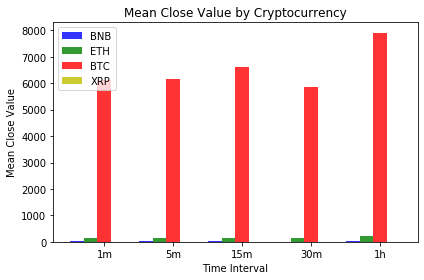

In [169]:
n_groups = 5
means_bnb = list(mean_closes_df.groupby("symbol").get_group("BNB")[["1m","5m","15m","30m","1h"]].iloc[0])
means_eth = list(mean_closes_df.groupby("symbol").get_group("ETH")[["1m","5m","15m","30m","1h"]].iloc[0])
means_btc = list(mean_closes_df.groupby("symbol").get_group("BTC")[["1m","5m","15m","30m","1h"]].iloc[0])
means_xrp = list(mean_closes_df.groupby("symbol").get_group("XRP")[["1m","5m","15m","30m","1h"]].iloc[0])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, means_bnb, bar_width,
alpha=opacity,
color='b',
label='BNB')

rects2 = plt.bar(index + bar_width, means_eth, bar_width,
alpha=opacity,
color='g',
label='ETH')

rects3 = plt.bar(index + 2*bar_width, means_btc, bar_width,
alpha=opacity,
color='r',
label='BTC')

rects4 = plt.bar(index + 3*bar_width, means_xrp, bar_width,
alpha=opacity,
color='y',
label='XRP')

plt.xlabel('Time Interval')
plt.ylabel('Mean Close Value')
plt.title('Mean Close Value by Cryptocurrency')
plt.xticks(index + 2*bar_width, ("1m","5m","15m","30m","1h"))
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

Once again, when comparing the mean close values for each of the cryptocurrencies, we notice that Bitcoin has the highest mean close value, which makes sense knowing that Bitcoin has the highest mean open value across all the time intervals and across each of the cryptocurrencies. Following these two plots, I am curious about the *difference* between mean close and mean open values for each time interval across the cryptocurrencies, which is what will be investigated next. 

In [164]:
diff_mean_df = pd.DataFrame(columns = ['symbol','1m', '5m', '15m', '30m', '1h'], index = range(0,4))

intervals = ["1m","5m","15m","30m", "1h"]
for a in range(0,4):
    for b in intervals:
        diff_mean_df[b].iloc[a] = mean_closes_df[b].iloc[a] - mean_opens_df[b].iloc[a]

diff_mean_df["symbol"] = ["BNB", "ETH", "BTC", "XRP"]
print(diff_mean_df)

  symbol       1m       5m       15m       30m        1h
0    BNB -0.00046  0.00512    0.0093    0.0289   0.07104
1    ETH    -0.04   -0.008     0.254     0.592     1.226
2    BTC   -0.766    0.668     5.424     21.12   -18.204
3    XRP   -2e-05    6e-05  0.000102  0.000302  0.000654


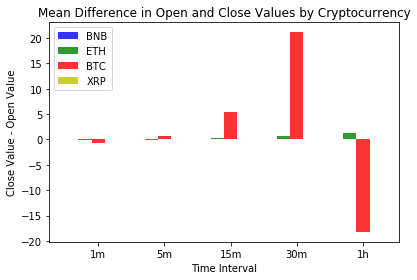

In [168]:
n_groups = 5
means_bnb = list(diff_mean_df.groupby("symbol").get_group("BNB")[["1m","5m","15m","30m","1h"]].iloc[0])
means_eth = list(diff_mean_df.groupby("symbol").get_group("ETH")[["1m","5m","15m","30m","1h"]].iloc[0])
means_btc = list(diff_mean_df.groupby("symbol").get_group("BTC")[["1m","5m","15m","30m","1h"]].iloc[0])
means_xrp = list(diff_mean_df.groupby("symbol").get_group("XRP")[["1m","5m","15m","30m","1h"]].iloc[0])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, means_bnb, bar_width,
alpha=opacity,
color='b',
label='BNB')

rects2 = plt.bar(index + bar_width, means_eth, bar_width,
alpha=opacity,
color='g',
label='ETH')

rects3 = plt.bar(index + 2*bar_width, means_btc, bar_width,
alpha=opacity,
color='r',
label='BTC')

rects4 = plt.bar(index + 3*bar_width, means_xrp, bar_width,
alpha=opacity,
color='y',
label='XRP')

plt.xlabel('Time Interval')
plt.ylabel('Close Value - Open Value')
plt.title('Mean Difference in Open and Close Values by Cryptocurrency')
plt.xticks(index + 2*bar_width, ("1m","5m","15m","30m","1h"))
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

The above plot was supposed to help us visualize better how different the mean change between open and close values are for each of the cryptocurrencies across each time interval. However, it looks ugly, due to how dramatic the changes are in the Bitcoin cryptocurrency. This time, let's scale the data so these differences can be better visualized. 

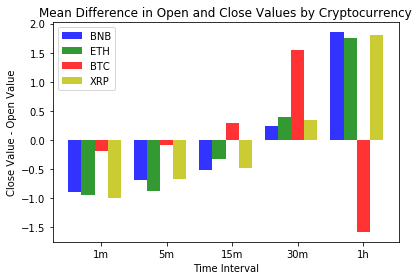

In [167]:
from sklearn import preprocessing

n_groups = 5
means_bnb = preprocessing.scale(list(diff_mean_df.groupby("symbol").get_group("BNB")[["1m","5m","15m","30m","1h"]].iloc[0]))
means_eth = preprocessing.scale(list(diff_mean_df.groupby("symbol").get_group("ETH")[["1m","5m","15m","30m","1h"]].iloc[0]))
means_btc = preprocessing.scale(list(diff_mean_df.groupby("symbol").get_group("BTC")[["1m","5m","15m","30m","1h"]].iloc[0]))
means_xrp = preprocessing.scale(list(diff_mean_df.groupby("symbol").get_group("XRP")[["1m","5m","15m","30m","1h"]].iloc[0]))

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, means_bnb, bar_width,
alpha=opacity,
color='b',
label='BNB')

rects2 = plt.bar(index + bar_width, means_eth, bar_width,
alpha=opacity,
color='g',
label='ETH')

rects3 = plt.bar(index + 2*bar_width, means_btc, bar_width,
alpha=opacity,
color='r',
label='BTC')

rects4 = plt.bar(index + 3*bar_width, means_xrp, bar_width,
alpha=opacity,
color='y',
label='XRP')

plt.xlabel('Time Interval')
plt.ylabel('Close Value - Open Value')
plt.title('Mean Difference in Open and Close Values by Cryptocurrency')
plt.xticks(index + 2*bar_width, ("1m","5m","15m","30m","1h"))
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

*Et voila!* After the data was scaled, we can see which cryptocurrencies at which time intervals close at higher values than where they opened. We can see that for the 1 and 5 minute time intervals, all the cryptocurrencies across the board close at lower values than they opened, indicated by the negative value in their bars. Starting at 15 minute time intervals, Bitcoin begins to close at a higher value than what it opens at, and at 30 minute time intervals, all of the cryptocurrencies close at higher values than where they opened. Oddly, the same can be said at the 1 hour time interval for all cryptocurrencies except for Bitcoin.

## *Step 4: Data Modeling*

Context for the problem: doing day by day trading, and we want to predict the closing price of the stock before the day was over. 

The following are the metrics of the stock we want to predict the closing price for:
* number of trades = 402
* open = .049867
* high = .132756
* low = .4223598
* volume = 180465.4463

Decide whether or not we want to sell the stock or buy more of it before the day was over.

In [176]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

cryptodf.reset_index()

x = cryptodf[["open", "high", "low", "volume", "number of trades"]]
y = cryptodf[["close"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [182]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
model.score(x_train, y_train)
predictors = [0.049867, .132756, .4223598, 180465.4463, 402]

pred_value = lm.predict(pd.DataFrame(predictors).transpose())
print("The predicted closing value of the stock is {}".format(pred_value[0][0]))

The predicted closing value of the stock is 0.7715777190662515


Therefore, since the predicted closing value of the stock is higher than the opening value, monetary gains would be maximized if more of the stock is bought throughout the day and then sold right before closing.

Decision: sell the stock. 